In [9]:
from Functionscopy import LoadData
from Functionscopy import TestStrategy
from Functionscopy import Backtesting
import os
import quantstats as qs
import pandas as pd
import yfinance as yf

In [10]:
current_directory = os.getcwd()
path = os.path.join(current_directory, 'Stocks_financials')

loader = LoadData(path)
prices, financials = loader.Load(start_date='2014-09-01', end_date=None)

Data processed for the following tickers: 


In [11]:
stocks = ['MSFT', 'V', 'NFLX', 'SO', 'DUK', 'PLD', 'VZ', 'T', 'CVX', 'VMC', 'NVDA', 'GE', 'KO', 'JNJ', 'GS', 'HD', 'AMD', 'ADM', 'META', 'GOOGL', 'TSLA', 'JPM', 'XOM', 'AAPL']
column_name = "Financial Ratio" 
reference_column = list(financials[stocks[0]][column_name])

all_equal = True

for stock in stocks[1:]:
    current_column = list(financials[stock][column_name])
    
    if current_column != reference_column:
        all_equal = False
        print(f"Las columnas no son iguales para {stock}.")
        break

if all_equal:
    print("La columna es igual para todos los tickers.")
else:
    print("Las columnas no son iguales entre todos los tickers.")

KeyError: 'MSFT'

In [8]:
offensive_tickers = ["MSFT", "AAPL", "GOOGL", 'V', 'NFLX', 'SO', 'DUK', 'VZ', 'T', 'CVX', 'VMC', 'NVDA', 'GE', 'KO', 'JNJ', 'HD', 'AMD', 'ADM', 'META', 'TSLA', 'XOM']   
defensive_tickers = ['JNJ', 'PG','TLT','GLD','WMT','BIL']     
protective_tickers = ['MSFT', 'V', 'NFLX', 'SO', 'DUK', 'PLD', 'VZ', 'T', 'CVX', 'VMC', 'NVDA', 'GE',
                      'KO', 'JNJ', 'GS', 'HD', 'AMD', 'ADM', 'META', 'GOOGL', 'TSLA', 'JPM', 'XOM', 'AAPL']   

In [4]:
financials["MSFT"]

KeyError: 'MSFT'

In [6]:
# DUK, JPM, GS
#['MSFT', 'V', 'NFLX', 'SO', 'DUK', 'PLD', 'VZ', 'T', 'CVX', 'VMC', 'NVDA', 'GE', 'KO', 'JNJ', 'GS', 'HD', 'AMD', 'ADM', 'META', 'GOOGL', 'TSLA', 'JPM', 'XOM', 'AAPL']
stocks = ["MSFT", "AAPL", "GOOGL", 'V', 'NFLX', 'SO', 'DUK', 'VZ', 'T', 'CVX', 'VMC', 'NVDA', 'GE', 'KO', 'JNJ', 'HD', 'AMD', 'ADM', 'META', 'TSLA', 'XOM'] 
column_name = "Financial Ratio"      
common_items = set(financials[stocks[0]][column_name])
for stock in stocks[1:]:
    current_items = set(financials[stock][column_name])
    common_items = common_items.intersection(current_items)
if common_items:
    print(f"Los siguientes ítems son comunes en todos los tickers: {common_items}")
else:
    print("No hay ítems comunes en todos los tickers.")

Los siguientes ítems son comunes en todos los tickers: {'Price/Book Value', ' = Operating Cycle', 'Price/Tangible Book Value', ' Operating Cycle - Days', 'Net Debt/FFO', 'Return on Assets', '    x Tax Rate Complement (1-Tax Rate) (%)', 'Enterprise Value/EBITDA', 'LT Debt/Total Assets', ' Asset Turnover Analysis', 'Cash & ST Investments', ' = Return on Equity (%)', ' Operating Efficiency', 'Free Cash Flow Margin', 'CFO/Total Debt', ' Per Share', 'Enterprise Value/Sales', 'EPS (recurring)', 'Net Debt/Total Equity (%)', 'Current Assets', 'Fixed-charge Coverage Ratio', 'Free Cash Flow per Share', 'Return on Common Equity', 'Total Debt/Equity (%)', 'Price/Sales', 'Return on Equity ', '    x Equity Multiplier (Assets/Equity)', 'Operating Margin', 'Asset Turnover ', 'Total Assets', 'Receivables', 'LT Debt/Total Capital', '    - Days of Payables Outstanding', ' Coverage', 'EBITDA-Capex/Interest Expense', '   Asset Turnover (x)', 'Capex To Sales', 'Enterprise Value/EBIT', 'Price/Free Cash Flow'

In [7]:
strategy = TestStrategy(prices, financials, offensive_tickers, defensive_tickers, protective_tickers)
chosen_universe = strategy.run_strategy(start_date='2014-09-01')

Financial Ratio  Return on Common Equity  Operating Margin  Current Ratio (x)  \
MSFT                           12.709018         26.371840           2.895365   
AAPL                           39.063759         27.773579           1.283117   
GOOGL                          14.238612         24.759224           5.143350   
V                              23.853019         65.735294           4.742049   
NFLX                            5.990990          3.598810           1.409343   
SO                             11.505856         26.967005           0.695137   
DUK                             6.411919         23.481621           0.729318   
VZ                            128.448892         24.768032           0.708904   
T                              13.191954         17.732618           0.853418   
CVX                             0.846101         -5.403631           1.087477   
VMC                             7.261089         18.271522           2.826214   
NVDA                        

In [8]:
chosen_universe

,Date,Chosen Universe,Selected Stocks
0,2015-09-01,Defensive,"[JNJ, PG, TLT, GLD, WMT, BIL]"
1,2016-03-01,Offensive,"[AAPL, VZ, ADM, MSFT, GOOGL, V, SO, DUK]"
2,2016-09-01,Offensive,"[AAPL, MSFT, GOOGL, V, SO, DUK, VZ, T]"
3,2017-03-01,Offensive,"[MSFT, AAPL, GOOGL, V, SO, DUK, VZ, T]"
4,2017-09-01,Offensive,"[VZ, MSFT, AAPL, GOOGL, V, SO, DUK, T]"
5,2018-03-01,Offensive,"[VZ, T, ADM, MSFT, AAPL, GOOGL, V, SO]"
6,2018-09-01,Offensive,"[VZ, T, ADM, MSFT, AAPL, GOOGL, V, SO]"
7,2019-03-01,Offensive,"[T, ADM, MSFT, AAPL, GOOGL, V, SO, DUK]"
8,2019-09-01,Offensive,"[SO, MSFT, AAPL, GOOGL, V, DUK, VZ, T]"
9,2020-03-01,Offensive,"[VZ, T, GE, XOM, ADM, MSFT, AAPL, GOOGL]"


In [9]:
chosen_universe["Chosen Universe"].value_counts()

Chosen Universe
Offensive    17
Defensive     2
Name: count, dtype: int64

In [10]:
strategy.get_momentum_dataframe()

,MSFT,V,NFLX,SO,DUK,PLD,VZ,T,CVX,VMC,...,HD,AMD,ADM,META,GOOGL,TSLA,JPM,XOM,AAPL,Average
2015-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-01,0.016243,0.006919,0.037001,0.004827,-0.003849,-0.007029,0.003055,0.006178,-0.018273,0.016453,...,0.007467,-0.020007,-0.022755,0.027148,0.023131,0.001567,-0.005847,-0.007308,-0.022146,0.003004
2016-09-01,0.026191,0.011654,-0.007971,0.014827,0.010961,0.030120,0.012238,0.018232,0.020168,0.018714,...,0.012941,0.137851,0.001166,0.030242,0.018951,-0.006827,0.005739,0.013320,-0.001873,0.020932
2017-03-01,0.020645,0.017191,0.040985,0.005579,0.010180,0.025544,-0.000203,0.011863,0.026441,0.018376,...,0.014021,0.183070,0.025821,0.021560,0.015136,0.026749,0.041710,0.002146,0.032162,0.029506
2017-09-01,0.022398,0.021384,0.054587,-0.004468,0.008251,0.015520,-0.005922,-0.006123,0.006323,0.005989,...,0.009986,0.059727,-0.003941,0.027861,0.016708,0.047633,0.026924,-0.010444,0.038169,0.018621
2018-03-01,0.033159,0.028701,0.068371,-0.013051,-0.006905,0.015051,-0.001757,-0.009934,0.000791,-0.000939,...,0.020581,-0.006814,-0.009482,0.024025,0.023892,0.029918,0.021457,-0.004706,0.023446,0.011375
2018-09-01,0.035498,0.030088,0.070611,-0.006811,-0.005203,0.005294,0.011742,-0.011416,0.009554,-0.004883,...,0.025810,0.071478,0.017439,0.003975,0.022884,-0.007434,0.020427,0.005397,0.030303,0.013716
2019-03-01,0.016197,0.016956,0.024393,0.013481,0.015028,0.014240,0.015608,-0.011562,0.007141,-0.001876,...,0.002892,0.083463,0.003667,-0.002940,0.003272,0.003269,-0.006993,0.005457,0.002369,0.006364
2019-09-01,0.018857,0.018773,-0.012409,0.024865,0.011759,0.020988,0.006686,0.009623,0.001145,0.021999,...,0.012947,0.036845,-0.020836,0.009811,-0.001010,-0.014160,-0.001119,-0.010177,-0.002620,0.003671
2020-03-01,0.032302,0.018258,0.005347,0.017983,0.002929,0.016634,-0.003201,0.011332,-0.018670,0.008477,...,0.014872,0.059391,-0.006951,0.016872,0.015940,0.083163,0.011782,-0.032461,0.042216,0.015831


In [11]:
backtest = Backtesting(chosen_universe, prices, 1000000)

In [12]:
value, info = backtest.run_backtest()

In [13]:
value, info = backtest.run_backtest()

In [14]:
print(value)

           Date          CVaR        Sharpe       Sortino  Equal Weight
0    2015-09-01  1.666667e+05  1.666667e+05  1.666667e+05  1.666667e+05
1    2015-09-02  1.689470e+05  1.689470e+05  1.689470e+05  1.689470e+05
2    2015-09-03  1.676621e+05  1.676621e+05  1.676621e+05  1.676621e+05
3    2015-09-04  1.652550e+05  1.652550e+05  1.652550e+05  1.652550e+05
4    2015-09-08  1.700149e+05  1.700149e+05  1.700149e+05  1.700149e+05
...         ...           ...           ...           ...           ...
2299 2024-10-01  3.898833e+07  2.701288e+07  3.965894e+07  4.082350e+07
2300 2024-10-02  3.898621e+07  2.696286e+07  3.965680e+07  4.082132e+07
2301 2024-10-03  3.883184e+07  2.687627e+07  3.949976e+07  4.065965e+07
2302 2024-10-04  3.902572e+07  2.696089e+07  3.969695e+07  4.086260e+07
2303 2024-10-07  2.973812e+07  1.537566e+07  3.025002e+07  3.113899e+07

[2304 rows x 5 columns]


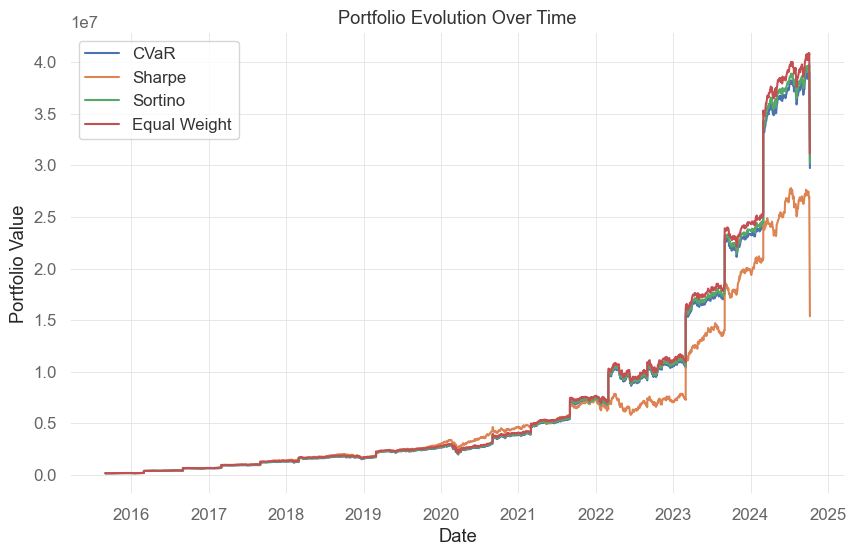

In [15]:
backtest.plot_portfolio_evolution(value)

In [16]:
info

,Date,Portfolio Value Before Rebalance (CVaR),Portfolio Value Before Rebalance (Sharpe),Portfolio Value Before Rebalance (Sortino),Portfolio Value Before Rebalance (Equal Weight),Weights (CVaR),Weights (Sharpe),Weights (Sortino),Weights (Equal Weight)
0,2015-09-01,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,"{'JNJ': 0.16666666666666666, 'PG': 0.166666666...","{'JNJ': 0.16666666666666666, 'PG': 0.166666666...","{'JNJ': 0.16666666666666666, 'PG': 0.166666666...","{'JNJ': 0.16666666666666666, 'PG': 0.166666666..."
1,2016-03-01,1.940493e+05,1.940493e+05,1.940493e+05,1.940493e+05,"{'AAPL': 0.0796723722260186, 'VZ': 0.383294604...","{'AAPL': 0.31078615648395697, 'VZ': 0.0, 'ADM'...","{'AAPL': 0.29854584664904527, 'VZ': 0.0, 'ADM'...","{'AAPL': 0.125, 'VZ': 0.125, 'ADM': 0.125, 'MS..."
2,2016-09-01,4.219149e+05,4.254599e+05,4.255339e+05,4.267612e+05,"{'AAPL': 0.0572270835419541, 'MSFT': 0.0800911...","{'AAPL': 0.31179582579581344, 'MSFT': 0.407352...","{'AAPL': 0.2980346731544517, 'MSFT': 0.4448409...","{'AAPL': 0.125, 'MSFT': 0.125, 'GOOGL': 0.125,..."
3,2017-03-01,6.692984e+05,7.188464e+05,7.174783e+05,7.147022e+05,"{'MSFT': 0.125, 'AAPL': 0.125, 'GOOGL': 0.125,...","{'MSFT': 0.4034612710018516, 'AAPL': 0.3210405...","{'MSFT': 0.125, 'AAPL': 0.125, 'GOOGL': 0.125,...","{'MSFT': 0.125, 'AAPL': 0.125, 'GOOGL': 0.125,..."
4,2017-09-01,9.577983e+05,1.054471e+06,9.969021e+05,1.022813e+06,"{'VZ': 0.125, 'MSFT': 0.125, 'AAPL': 0.125, 'G...","{'VZ': 2.2817012399248712e-18, 'MSFT': 0.40346...","{'VZ': 0.125, 'MSFT': 0.125, 'AAPL': 0.125, 'G...","{'VZ': 0.125, 'MSFT': 0.125, 'AAPL': 0.125, 'G..."
5,2018-03-01,1.241346e+06,1.435703e+06,1.270499e+06,1.325734e+06,"{'VZ': 0.125, 'T': 0.125, 'ADM': 0.125, 'MSFT'...","{'VZ': 4.0632275542109395e-18, 'T': 2.49337873...","{'VZ': 0.125, 'T': 0.125, 'ADM': 0.125, 'MSFT'...","{'VZ': 0.125, 'T': 0.125, 'ADM': 0.125, 'MSFT'..."
6,2018-09-01,1.770335e+06,1.994814e+06,1.808123e+06,1.874102e+06,"{'VZ': 0.125, 'T': 0.125, 'ADM': 0.125, 'MSFT'...","{'VZ': 4.0632275542109395e-18, 'T': 2.49337873...","{'VZ': 0.125, 'T': 0.125, 'ADM': 0.125, 'MSFT'...","{'VZ': 0.125, 'T': 0.125, 'ADM': 0.125, 'MSFT'..."
7,2019-03-01,1.728707e+06,1.889580e+06,1.765560e+06,1.829193e+06,"{'T': 0.125, 'ADM': 0.125, 'MSFT': 0.125, 'AAP...","{'T': 9.34123727401552e-18, 'ADM': 7.226066803...","{'T': 0.125, 'ADM': 0.125, 'MSFT': 0.125, 'AAP...","{'T': 0.125, 'ADM': 0.125, 'MSFT': 0.125, 'AAP..."
8,2019-09-01,2.345128e+06,2.511312e+06,2.390577e+06,2.469795e+06,"{'SO': 0.125, 'MSFT': 0.125, 'AAPL': 0.125, 'G...","{'SO': 0.10214591217662013, 'MSFT': 0.40346119...","{'SO': 0.125, 'MSFT': 0.125, 'AAPL': 0.125, 'G...","{'SO': 0.125, 'MSFT': 0.125, 'AAPL': 0.125, 'G..."
9,2020-03-01,2.503035e+06,2.920252e+06,2.551586e+06,2.636109e+06,"{'VZ': 0.125, 'T': 0.125, 'GE': 0.125, 'XOM': ...","{'VZ': 4.2932215667134474e-18, 'T': 0.0, 'GE':...","{'VZ': 0.125, 'T': 0.125, 'GE': 0.125, 'XOM': ...","{'VZ': 0.125, 'T': 0.125, 'GE': 0.125, 'XOM': ..."


In [17]:
value['Date'] = pd.to_datetime(value['Date']) 
value.set_index('Date', inplace=True)
portfolio_cvar = value['CVaR']
portfolio_sharpe = value['Sharpe']
portfolio_sortino = value['Sortino']
portfolio_EW = value['Equal Weight']
benchmark = pd.DataFrame(yf.download('SPY', start='2005-09-01', end='2024-09-23')["Adj Close"])

[*********************100%***********************]  1 of 1 completed


C:\Users\rania\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
C:\Users\rania\anaconda3\Lib\site-packages\quantstats\utils.py:269: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  .pct_change()


C:\Users\rania\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\rania\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\rania\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **p

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2015-09-02   2015-09-02
End Period                 2024-10-07   2024-10-07
Risk-Free Rate             0.0%         0.0%
Time in Market             0.0%         100.0%

Cumulative Return          0.00%        18,050.01%
CAGR﹪                     0.0%         48.35%

Sharpe                     -            1.26
Prob. Sharpe Ratio         -            100.0%
Smart Sharpe               -            1.24
Sortino                    -            4.83
Smart Sortino              -            4.78
Sortino/√2                 -            3.41
Smart Sortino/√2           -            3.38
Omega                      1.84         1.84

Max Drawdown               -            -30.63%
Longest DD Days            -            -
Volatility (ann.)          0.0%         54.36%
R^2                        0.0          0.0
Information Ratio          0.08         0.08
Calmar            

C:\Users\rania\anaconda3\Lib\site-packages\quantstats\stats.py:927: RuntimeWarning: invalid value encountered in scalar divide
  beta = matrix[0, 1] / matrix[1, 1]


None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-20,2020-03-23,2020-08-05,168,-30.631563,-24.522462
2,2024-10-07,2024-10-07,2024-10-07,1,-23.797615,NaN
3,2022-04-05,2022-06-17,2022-09-01,150,-16.845529,-14.857623
4,2018-10-03,2018-12-24,2019-03-01,150,-15.512326,-12.665117
5,2022-09-13,2022-10-12,2022-11-10,59,-10.775330,-10.697975


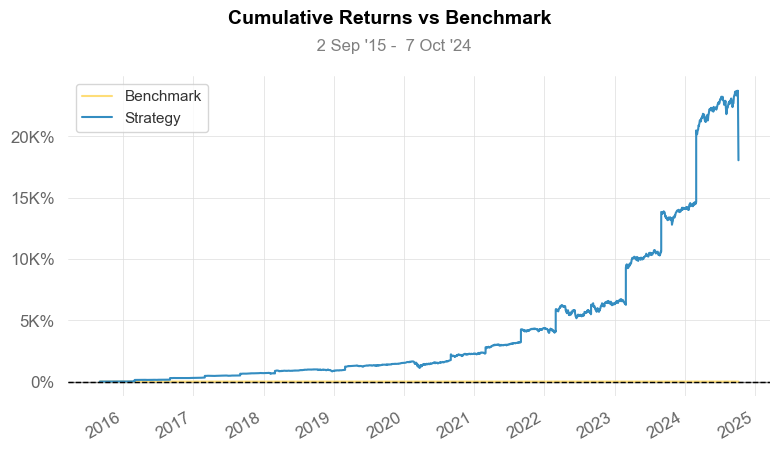

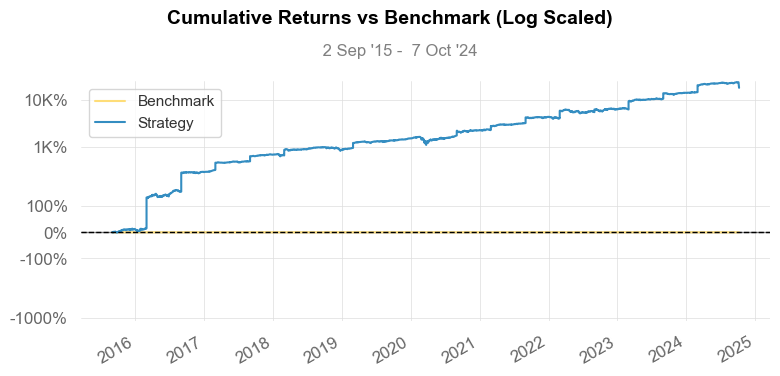

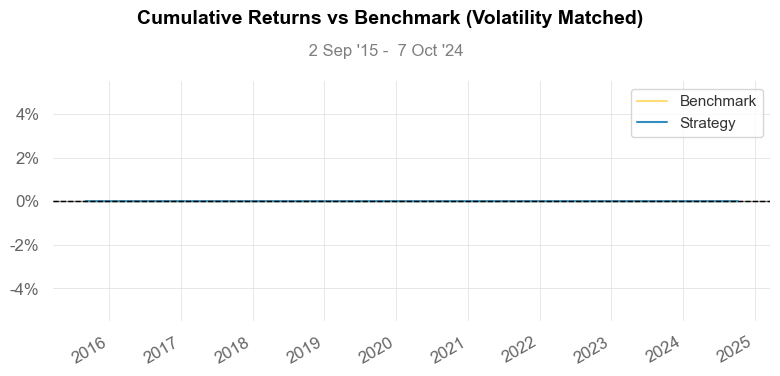

C:\Users\rania\anaconda3\Lib\site-packages\quantstats\_plotting\wrappers.py:555: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample("A")
C:\Users\rania\anaconda3\Lib\site-packages\quantstats\_plotting\wrappers.py:557: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  .resample("A")
C:\Users\rania\anaconda3\Lib\site-packages\quantstats\_plotting\wrappers.py:565: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").apply(_stats.comp)
C:\Users\rania\anaconda3\Lib\site-packages\quantstats\_plotting\wrappers.py:568: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").last()


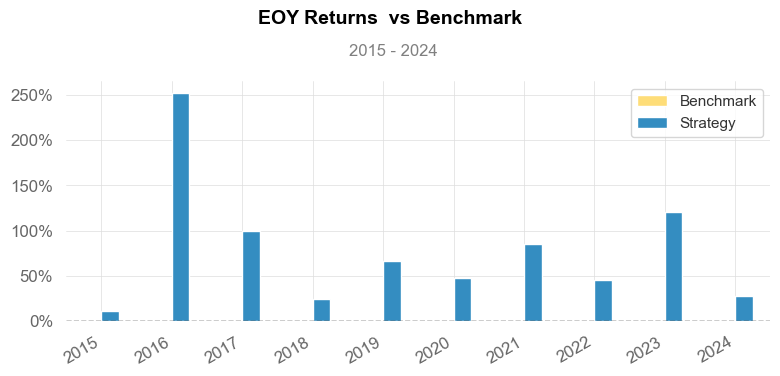

C:\Users\rania\anaconda3\Lib\site-packages\quantstats\_plotting\core.py:433: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(resample)
C:\Users\rania\anaconda3\Lib\site-packages\quantstats\_plotting\core.py:435: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(resample)
C:\Users\rania\anaconda3\Lib\site-packages\quantstats\_plotting\core.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns.fillna(0).resample(resample).apply(apply_fnc).resample(resample).last()
C:\Users\rania\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rania\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarni

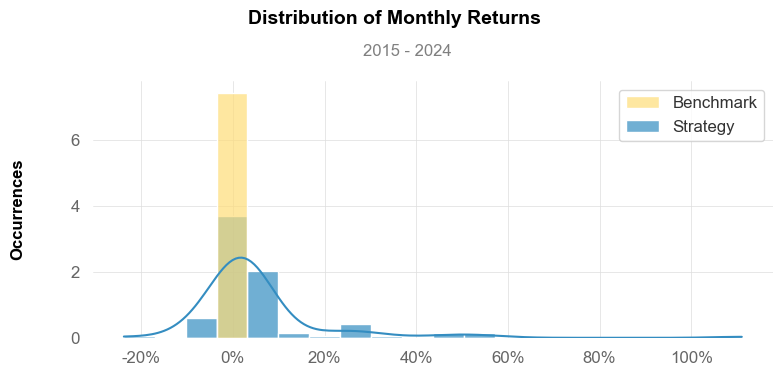

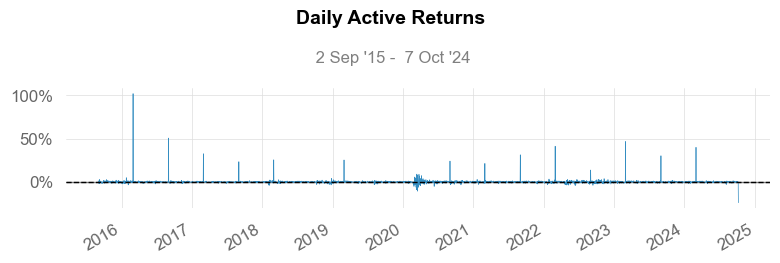

ValueError: Index contains duplicate entries, cannot reshape

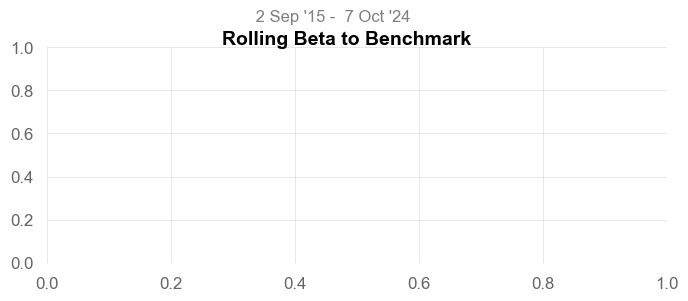

In [18]:
qs.reports.full(portfolio_sortino, benchmark = benchmark)